# HUHU@IberLEF2023 Task 2b (Regression - Graphs)

## Libraries

In [1]:
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sb

## Environment

In [2]:
EXP_NAME = "exp0"
PATH = os.getcwd() + "\\experiments\\" + EXP_NAME

In [3]:
PATHS_TRANSFORMERS_LIST = []
for i in os.walk(PATH):
    PATHS_TRANSFORMERS_LIST.append(i[0])
PATHS_TRANSFORMERS_LIST = PATHS_TRANSFORMERS_LIST[2:]

In [4]:
PATH_BEST_ENSEMBLE = PATH + "\\best-ensemble.json"

In [5]:
PATH_TEST_PREDICTIONS = PATH + "\\test-predictions.csv"

In [6]:
PATHS_EVALUATUONS_LIST = []
for i in PATHS_TRANSFORMERS_LIST:
    PATHS_EVALUATUONS_LIST.append((i + "\\model-evaluation.json"))

In [7]:
with open(PATH_BEST_ENSEMBLE) as file:
    best_ensemble = json.load(file)

In [8]:
test_predictions = pd.read_csv(PATH_TEST_PREDICTIONS).drop("text", axis = 1)

In [9]:
transformers = []
for i in PATHS_EVALUATUONS_LIST:
    name = re.search(r"(?<=\\)[^\\]+(?=\\model-evaluation.json)", i).group(0)
    with open(i, encoding = "utf8") as file:
        globals()[name] = json.load(file)
    transformers.append(name)

## Graphs

### True VS Predicted Scores

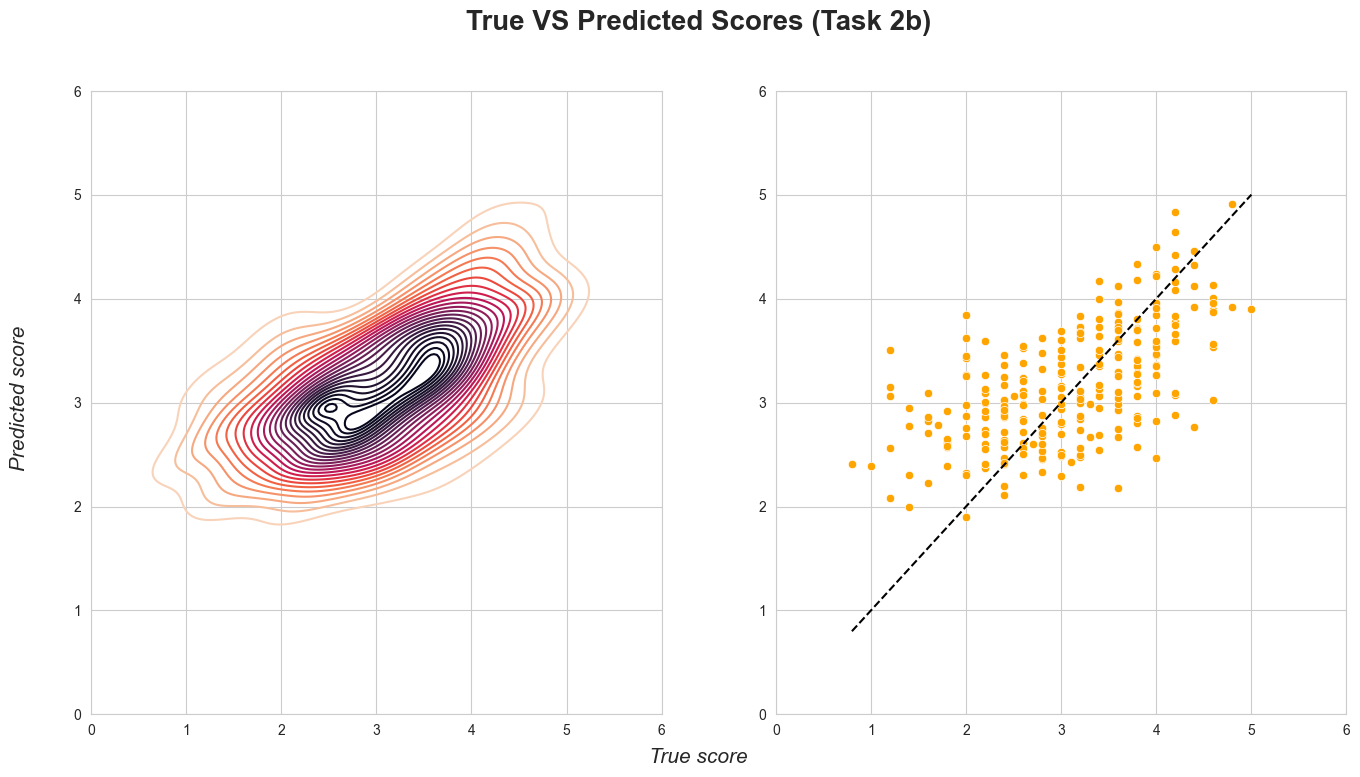

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16.2, 8.1))


min_score = min(min(test_predictions["score"]), min(test_predictions["predicted_score"]))
max_score = max(max(test_predictions["score"]), max(test_predictions["predicted_score"]))


sb.kdeplot(data = test_predictions, x = "score", y = "predicted_score", fill = False, thresh = 0, levels = 25, cmap = "rocket_r", ax = ax1)
ax1.set_xlabel("", labelpad = 0)
ax1.set_ylabel("", labelpad = 0)
ax1.set_xlim(0, max_score + 1)
ax1.set_ylim(0, max_score + 1)


sb.scatterplot(data = test_predictions, x = "score", y = "predicted_score", color = "orange", ax = ax2)
ax2.plot([min_score, max_score], [min_score, max_score], "k--")
ax2.set_xlabel("", labelpad = 0)
ax2.set_ylabel("", labelpad = 0)
ax2.set_xlim(0, max_score + 1)
ax2.set_ylim(0, max_score + 1)


fig.suptitle("True VS Predicted Scores (Task 2b)", fontsize = 20, weight = "bold")
fig.text(0.5, 0.05, "True score", ha = "center", fontsize = 15, style = "italic")
fig.text(0.075, 0.5, "Predicted score", va = "center", rotation = "vertical", fontsize = 15, style = "italic")


fig.savefig(os.path.join(PATH + "\\!graphs", "TRUE-PRED-SCORES-T2B.png"))
fig.savefig(os.path.join(PATH + "\\!graphs", "TRUE-PRED-SCORES-T2B.pdf"))
plt.show()

### All Transformers

In [11]:
data = {}
for i in transformers:
    data[i] = globals()[i]["metrics"]

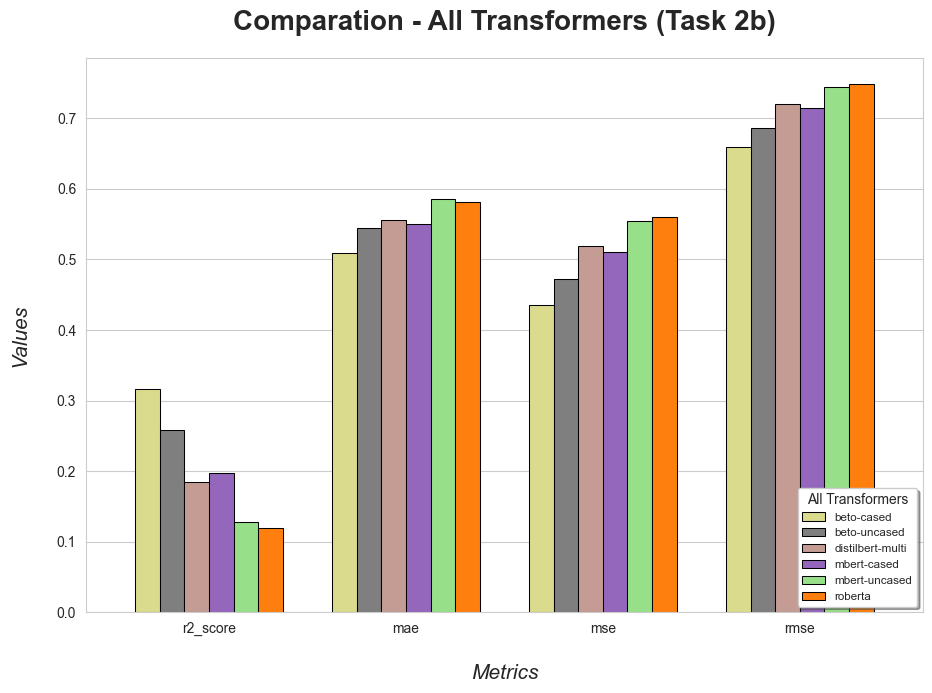

In [12]:
dataframe = pd.DataFrame(data)
fig_mc, ax_mc = plt.subplots(figsize = (10.8, 7.2))


dataframe.plot(kind = "bar", ax = ax_mc, color = sb.color_palette("tab20_r"), width = 0.75, edgecolor = "black", linewidth = 3/4)
ax_mc.xaxis.grid(False)
plt.xlabel("Metrics", labelpad = 20, fontsize = 15, style = "italic")
plt.xticks(rotation = 0)
plt.ylabel("Values", labelpad = 20, fontsize = 15, style = "italic")
plt.title("Comparation - All Transformers (Task 2b)", fontsize = 20, pad = 20, weight = "bold")
ax_mc.legend(title = "All Transformers", loc = "lower right", fontsize = "small", shadow = True)

# Save ROC curve
fig_mc.savefig(os.path.join(PATH + "\\!graphs", "COMPARATION-T2B.png"))
fig_mc.savefig(os.path.join(PATH + "\\!graphs", "COMPARATION-T2B.pdf"))
plt.show()

### Ensemble Ponderation Votation

In [13]:
rmse_summs = 0
for i in best_ensemble["models"]:
    rmse_summs += 1 / globals()[i]["metrics"]["rmse"]

In [14]:
votation_values = []
for i in best_ensemble["models"]:
    votation_values.append((1 / globals()[i]["metrics"]["rmse"]) / rmse_summs)

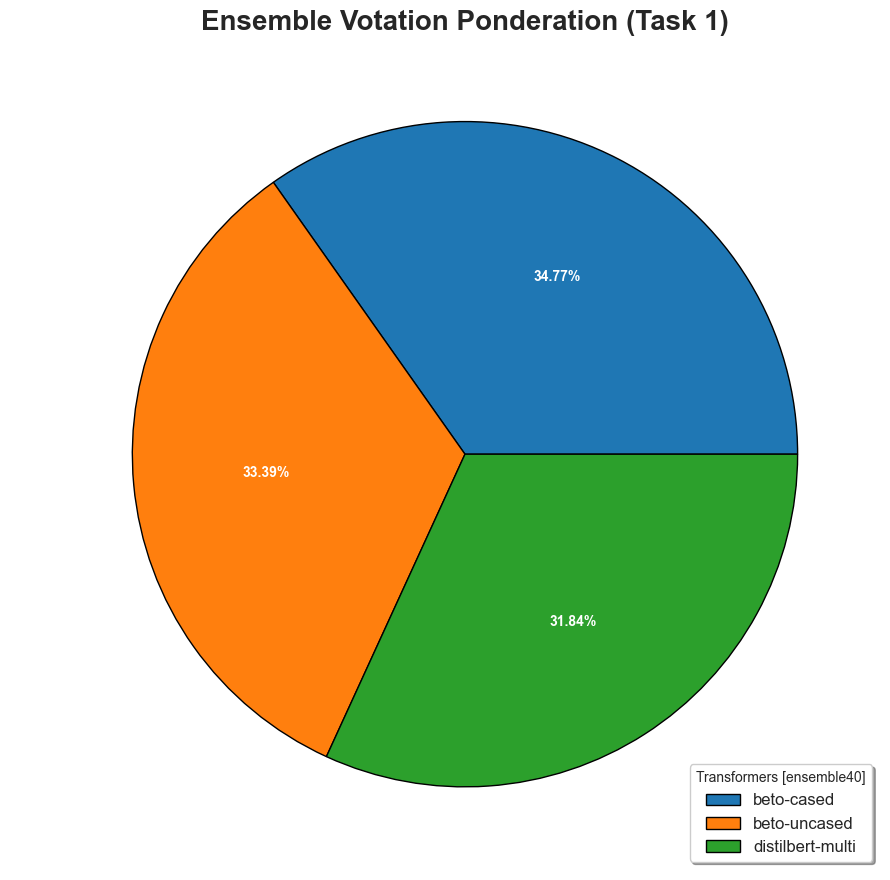

In [15]:
fig_votation, ax_votation= plt.subplots(figsize = (10.8, 10.8))


plt.pie(votation_values, labels = best_ensemble["models"], autopct = '%1.2f%%', textprops = {"fontsize": 10, "weight": "bold", "color": "white"}, wedgeprops = {"linewidth": 1, "edgecolor": "black"})


plt.title("Ensemble Votation Ponderation (Task 1)", fontsize = 20, weight = "bold")
plt.legend(title = "Transformers [" + best_ensemble["name"] + "]", loc = "lower right", fontsize = "large", shadow = True)
plt.axis("off")
ax_votation.set_frame_on(False)


fig_votation.savefig(os.path.join(PATH + "\\!graphs", "ENSEMBLE-VOTATION-T2B.png"))
fig_votation.savefig(os.path.join(PATH + "\\!graphs", "ENSEMBLE-VOTATION-T2B.pdf"))
plt.show()